## Name- Ranjan Pratap Singh                                                      DS2307

## Loan Application Status Prediction
### Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:

1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions

3.	Married - This refers to applicant being in a state of matrimony

4.	Dependents - This refres to persons who depends on the applicants for survival

5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university

6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer

7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.

8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.

9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.

10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant

11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.

12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.

13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 


### Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')


### Importing Dataset

In [22]:
df = pd.read_csv(r"C:\Users\RANJAN\Downloads\loan_prediction.csv")

### Exploratory Data Analysis(EDA)  ----->

In [23]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


our dataset is of Loan Application Status Prediction has 614 rows and 13 columns. Loan_status is our target variable amd it is of categorical nature so we will use classification models to train,test and precit the data 

In [24]:
df.duplicated().sum()

0

here we can see that there are no duplicated valeus in the dataset

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


here we can see that our dataset contain 3 dtpyes i.e. object, int and float and there are  null values in our data set  we will further check later for white spaces 

In [26]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
df['Credit_History'] = df['Credit_History'].astype(str)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(str).str.replace('\.0', '')


In [28]:
#  checking the values counts pf each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64


Male      489
Female    112
Name: Gender, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253

In [33]:
df.replace("nan", np.nan, inplace=True)

In [34]:
df[['LoanAmount']] = df[['LoanAmount']].fillna(df[['LoanAmount']].median())

In [35]:
df[['Gender','Dependents','Self_Employed','Loan_Amount_Term','Credit_History','Married']] = df[['Gender','Dependents','Self_Employed','Loan_Amount_Term','Credit_History','Married']].fillna(df[['Married','Gender','Dependents','Self_Employed','Loan_Amount_Term','Credit_History']].mode().iloc[0])


In [36]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

here we can see that there are no white spaces but there are null values so we will do various steps to fill these 

In [13]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443
std,6109.041673,2926.248369,84.107233
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.250000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,164.750000
max,81000.000000,41667.000000,700.000000


In description we have count,mean, standard deviation(STD) , minimum(min), 25%,50%(median),75%,maximum(max)

as we can see that there is no negative value so our description of dataset is valid 

number of observations are same in all columns so there is no missing values

if we compare mean with median i.e. 50% we can see  all the data have almost same so  the data is normally distributed

if we see for outliers we can observe that some coulmn may contain outliers that we will check  later in this model

### Data Visualization --->

- Univariate

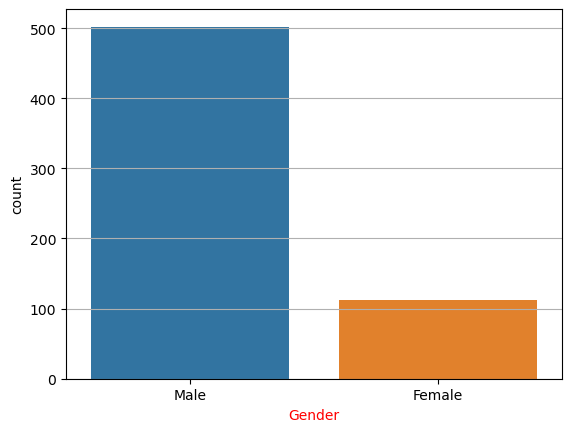

Male      502
Female    112
Name: Gender, dtype: int64

In [15]:
sns.countplot(x='Gender' , data = df )
plt.xlabel('Gender',color = 'r')
plt.grid(axis ='y')
plt.show()
df['Gender'].value_counts()

here we can see that number of men are more than number of women

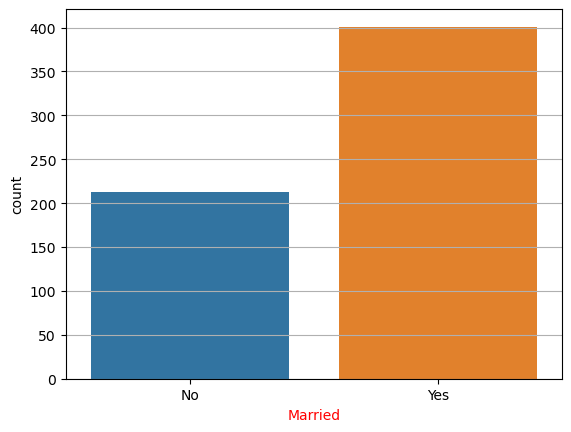

Yes    401
No     213
Name: Married, dtype: int64

In [16]:
sns.countplot(x='Married' , data = df )
plt.xlabel('Married',color = 'r')
plt.grid(axis ='y')
plt.show()
df['Married'].value_counts()

here we can see that there are more married people in the dataset

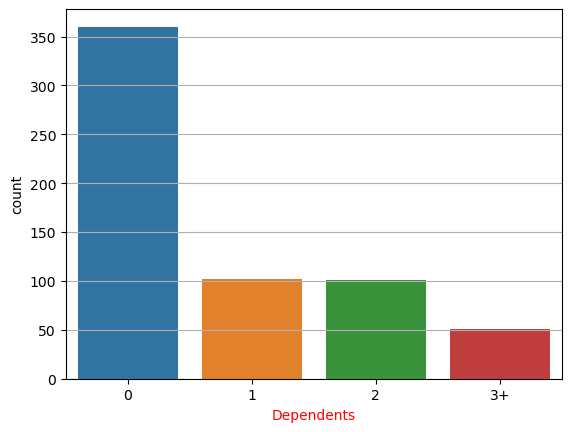

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [17]:
sns.countplot(x='Dependents' , data = df )
plt.xlabel('Dependents',color = 'r')
plt.grid(axis ='y')
plt.show()
df['Dependents'].value_counts()

here we can see that most of people have 0 dependents

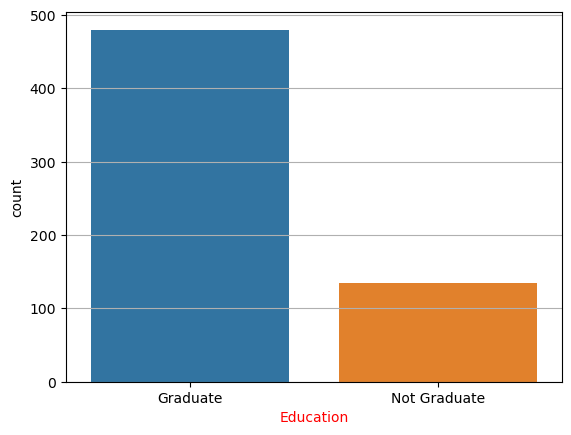

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [18]:
sns.countplot(x='Education' , data = df )
plt.xlabel('Education',color = 'r')
plt.grid(axis ='y')
plt.show()
df['Education'].value_counts()

here we can see that most of people are graduate

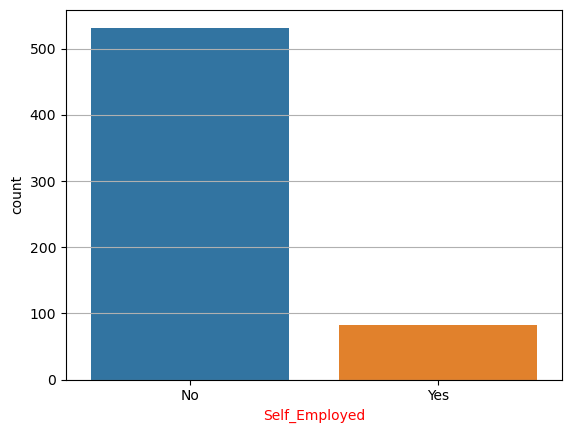

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [19]:
sns.countplot(x='Self_Employed' , data = df )
plt.xlabel('Self_Employed',color = 'r')
plt.grid(axis ='y')
plt.show()
df['Self_Employed'].value_counts()

here we can see that most of people are not self employed

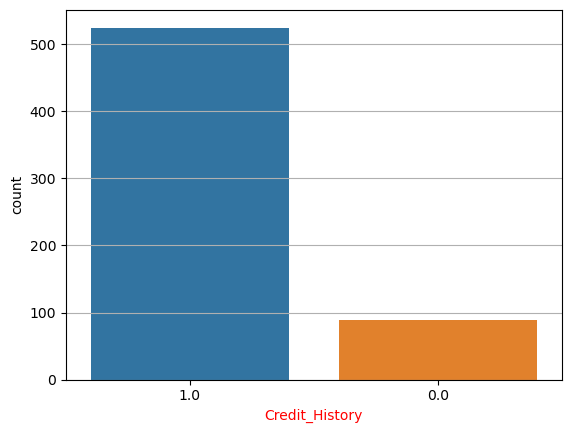

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [38]:
sns.countplot(x='Credit_History' , data = df )
plt.xlabel('Credit_History',color = 'r')
plt.grid(axis ='y')
plt.show()
df['Credit_History'].value_counts()

here we can see that most of people have credit history 

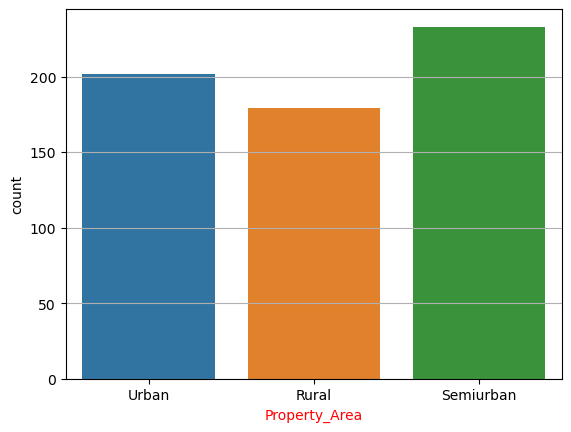

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [39]:
sns.countplot(x='Property_Area' , data = df )
plt.xlabel('Property_Area',color = 'r')
plt.grid(axis ='y')
plt.show()
df['Property_Area'].value_counts()

here we can see that most of the people have property area in semi-urban then urban and very less Rural

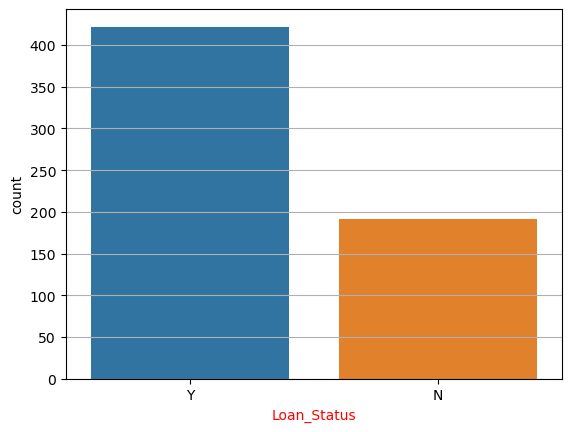

Y    422
N    192
Name: Loan_Status, dtype: int64

In [40]:
sns.countplot(x='Loan_Status' , data = df )
plt.xlabel('Loan_Status',color = 'r')
plt.grid(axis ='y')
plt.show()
df['Loan_Status'].value_counts()

here we can see that most of the people have loan status

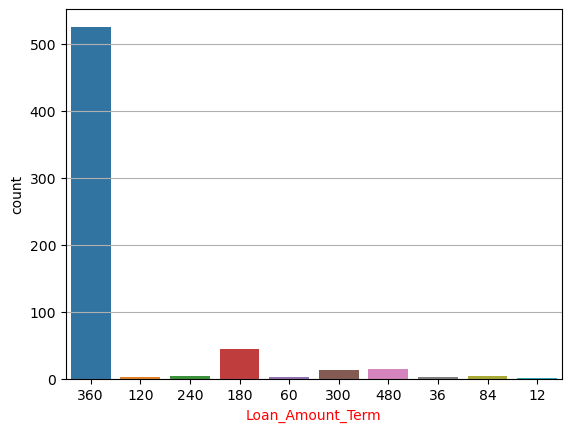

360    526
180     44
480     15
300     13
240      4
84       4
120      3
60       2
36       2
12       1
Name: Loan_Amount_Term, dtype: int64

In [46]:
sns.countplot(x='Loan_Amount_Term' , data = df )
plt.xlabel('Loan_Amount_Term',color = 'r')
plt.grid(axis ='y')
plt.show()
df['Loan_Amount_Term'].value_counts()

In [ ]:
here we can see that most of poeple have loan amount term of 360

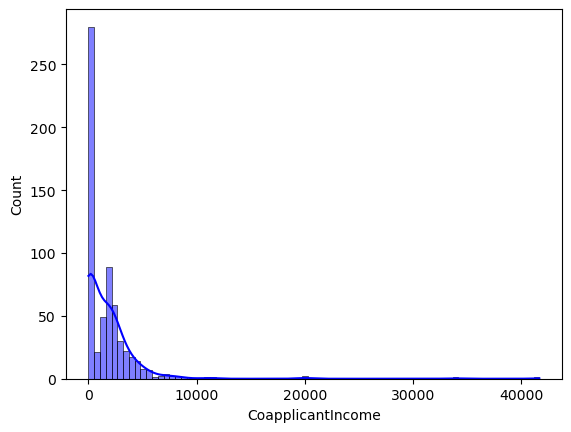

In [41]:
sns.histplot(x='CoapplicantIncome', data=df, kde=True, color='blue')
plt.show()

here we can see that data is positively skewed

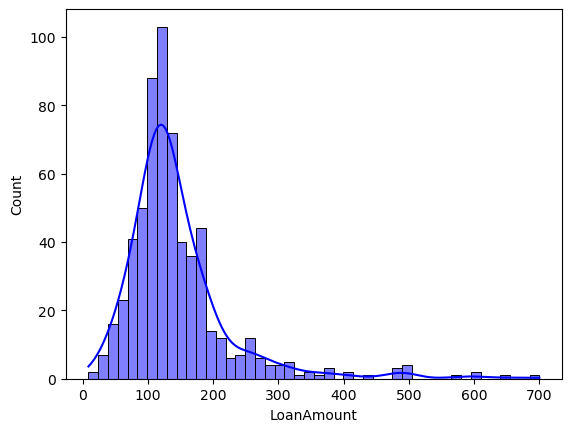

In [70]:
sns.histplot(x='LoanAmount', data=df, kde=True, color='blue')
plt.show()

here we can see that data is positively skewed

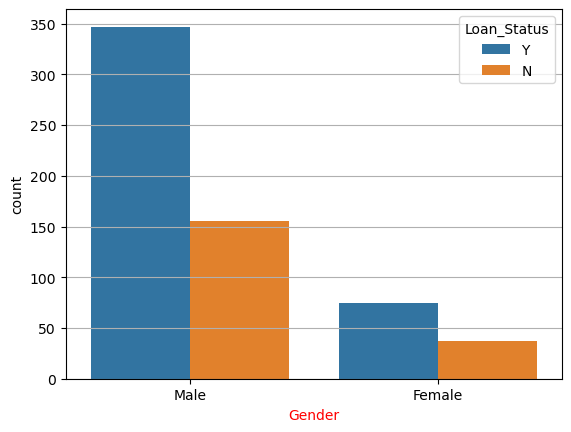

Male      502
Female    112
Name: Gender, dtype: int64

In [50]:
sns.countplot(x='Gender' , data = df,hue='Loan_Status' )
plt.xlabel('Gender',color = 'r')
plt.grid(axis ='y')
plt.show()
df['Gender'].value_counts()

here we can see that comparitively women has more loan Status than men

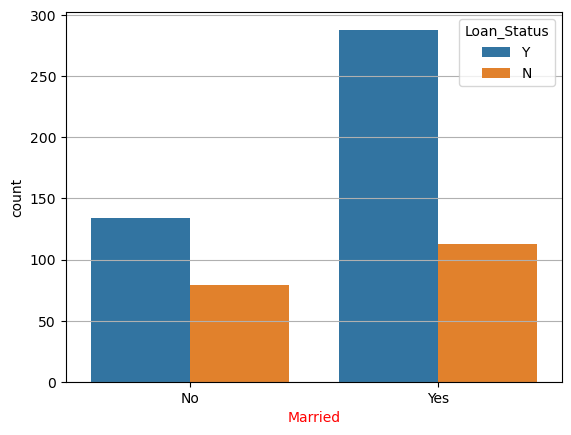

Yes    401
No     213
Name: Married, dtype: int64

In [51]:
sns.countplot(x='Married' , data = df,hue='Loan_Status' )
plt.xlabel('Married',color = 'r')
plt.grid(axis ='y')
plt.show()
df['Married'].value_counts()

here we can see that comparitively non married has more loan Status.

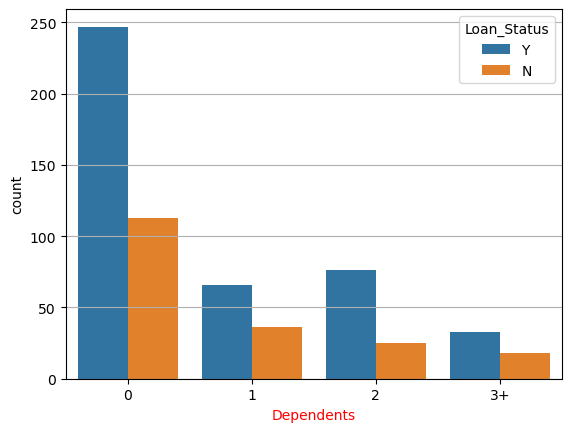

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [52]:
sns.countplot(x='Dependents' , data = df,hue='Loan_Status' )
plt.xlabel('Dependents',color = 'r')
plt.grid(axis ='y')
plt.show()
df['Dependents'].value_counts()

here we can see that comparitively dependents 1 and 3+ have more loan Status.

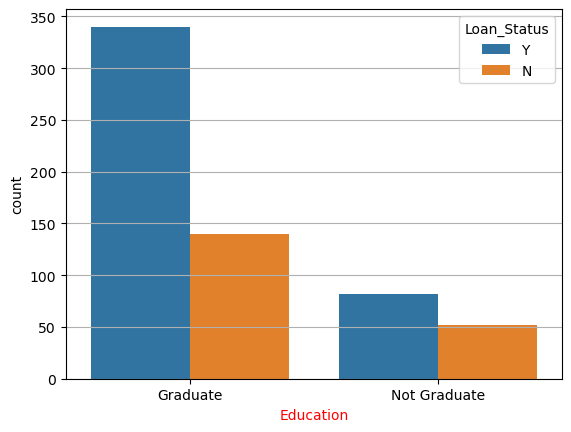

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [53]:
sns.countplot(x='Education' , data = df,hue='Loan_Status' )
plt.xlabel('Education',color = 'r')
plt.grid(axis ='y')
plt.show()
df['Education'].value_counts()


here we can see that comparitively Not Graduate has more loan Status.

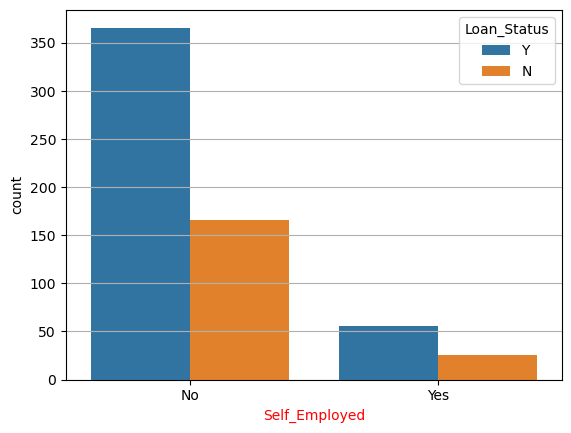

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [54]:
sns.countplot(x='Self_Employed' , data = df,hue='Loan_Status' )
plt.xlabel('Self_Employed',color = 'r')
plt.grid(axis ='y')
plt.show()
df['Self_Employed'].value_counts()


here we can see that comparitively who are not selfemployed has more loan Status.

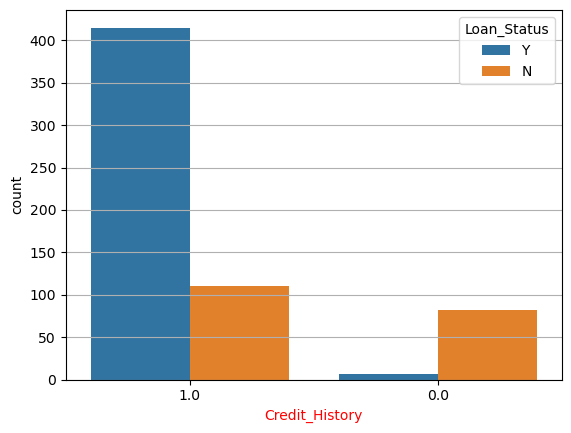

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [55]:
sns.countplot(x='Credit_History' , data = df,hue='Loan_Status' )
plt.xlabel('Credit_History',color = 'r')
plt.grid(axis ='y')
plt.show()
df['Credit_History'].value_counts()


here we can see that comparitively people that has no credit history  has more loan Status

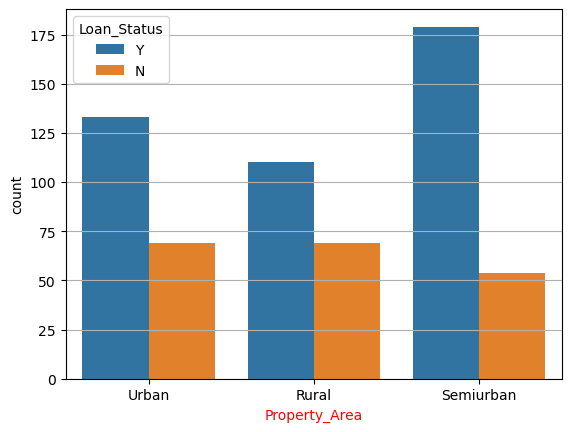

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [56]:
sns.countplot(x='Property_Area' , data = df,hue='Loan_Status' )
plt.xlabel('Property_Area',color = 'r')
plt.grid(axis ='y')
plt.show()
df['Property_Area'].value_counts()


here we can see that comparitively rural property_Area has more loan Status 

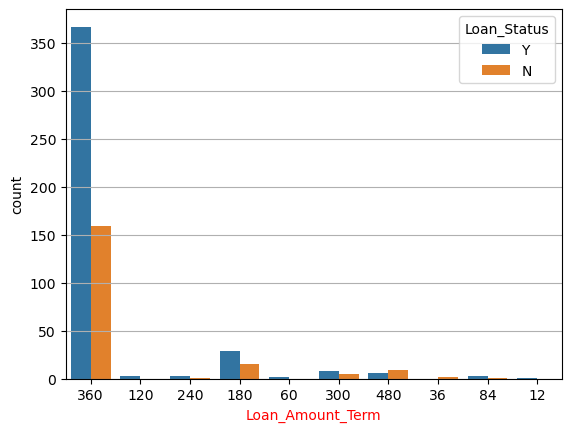

360    526
180     44
480     15
300     13
240      4
84       4
120      3
60       2
36       2
12       1
Name: Loan_Amount_Term, dtype: int64

In [58]:
sns.countplot(x='Loan_Amount_Term' , data = df,hue='Loan_Status' )
plt.xlabel('Loan_Amount_Term',color = 'r')
plt.grid(axis ='y')
plt.show()
df['Loan_Amount_Term'].value_counts()

here we can see that comparitively loan_amount_term has more loan Status than men

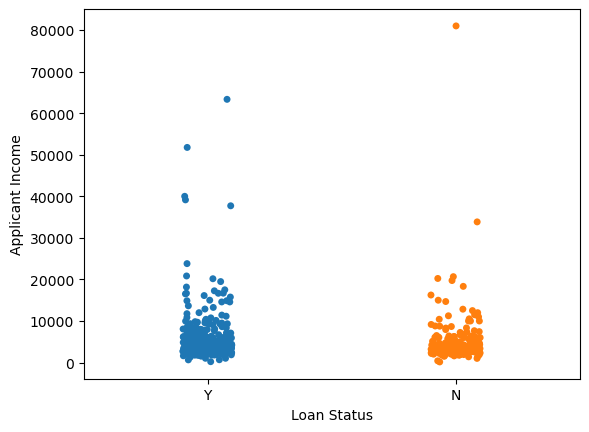

In [63]:
sns.stripplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.show()

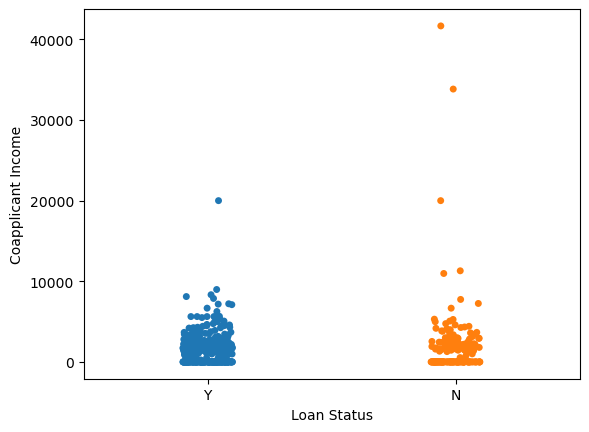

In [66]:
sns.stripplot(x='Loan_Status', y='CoapplicantIncome', data=df)
plt.xlabel('Loan Status')
plt.ylabel('Coapplicant Income')
plt.show()

here we can not find any significant relationship

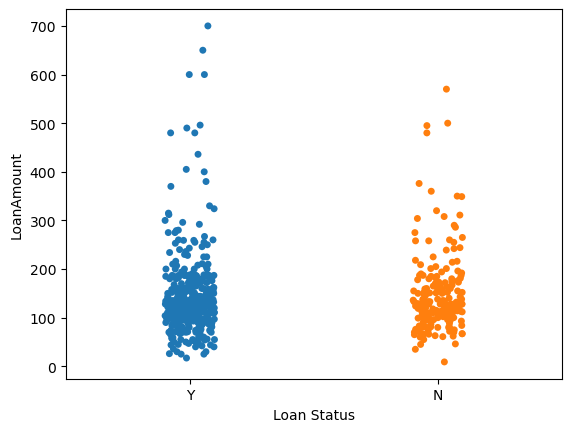

In [65]:
sns.stripplot(x='Loan_Status', y='LoanAmount', data=df)
plt.xlabel('Loan Status')
plt.ylabel('LoanAmount')
plt.show()

here we can not find any significant relationship

<function matplotlib.pyplot.show(close=None, block=None)>

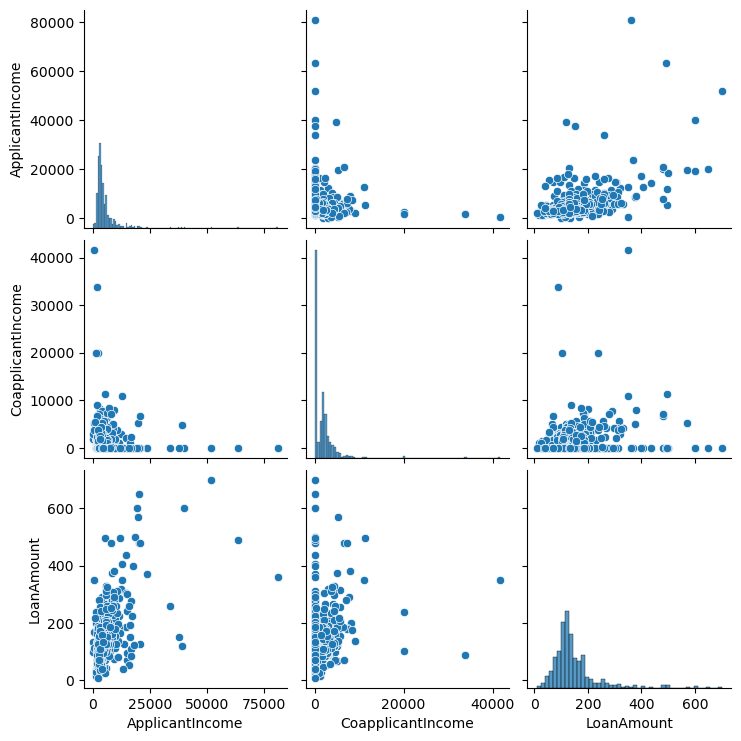

In [68]:
sns.pairplot(data = df)
plt.show

### -- Checking for Outliers

In [15]:
df1 = df.select_dtypes(exclude='object')
df1.columns 

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], dtype='object')

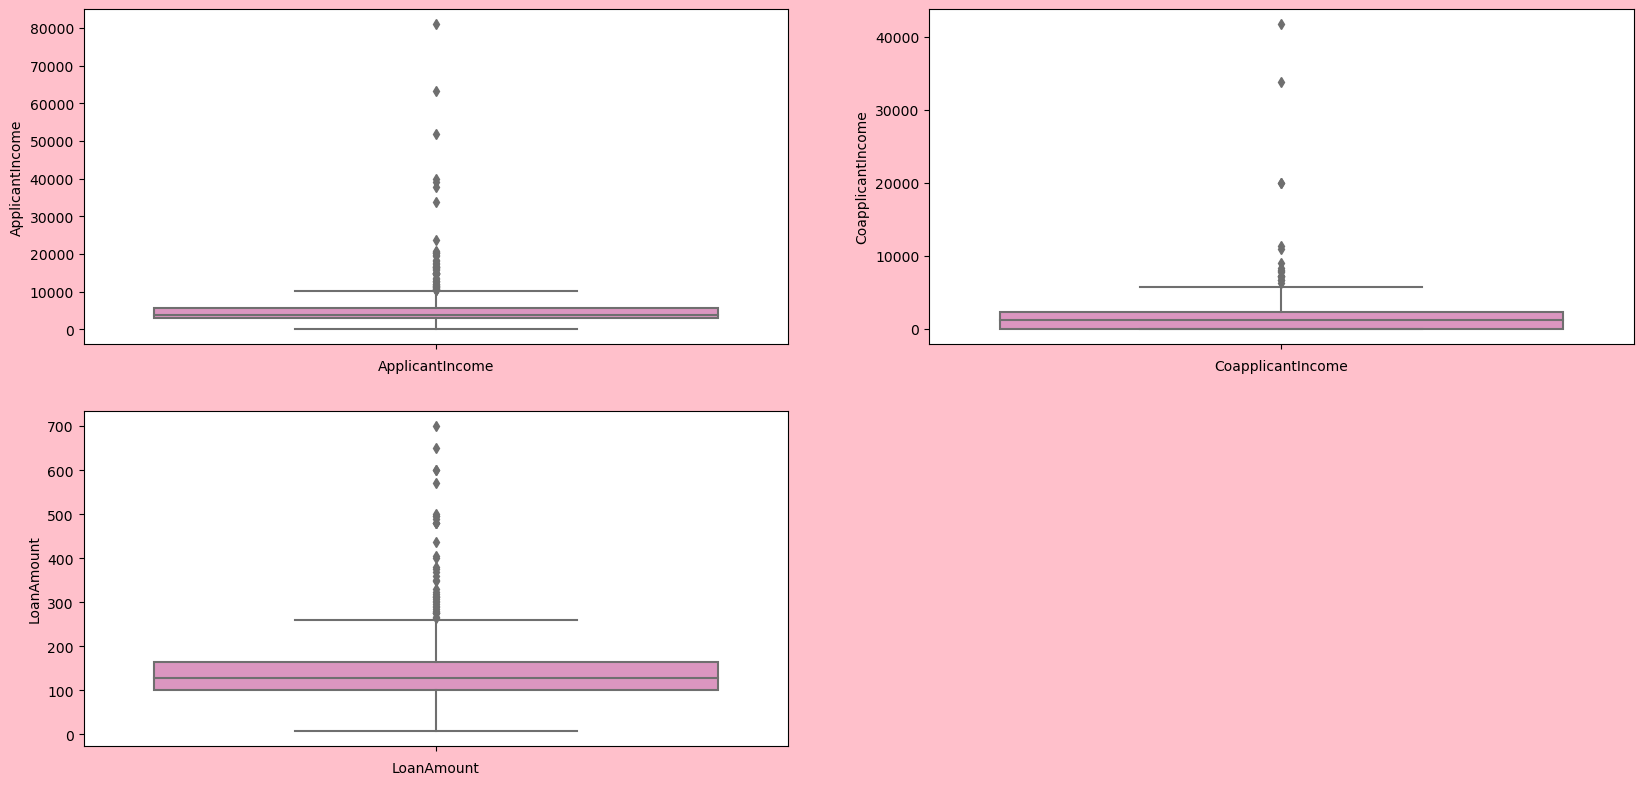

In [16]:
plt.figure(figsize=(20, 20), facecolor="pink")
plotnumber = 1
for i in df1.columns: 
    ax = plt.subplot(4, 2, plotnumber)  
    sns.boxplot(data=df1, y=i, palette='Set2_r')
    ax.set_xlabel(i)
    plotnumber += 1

plt.show()


here we can see that ourdata set have outliers we will remove the outliers by using Zscore 

In [17]:
from scipy.stats import zscore
z = np.abs(zscore(df1))
z

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.072991,0.554487,0.211241
1,0.134412,0.038732,0.211241
2,0.393747,0.554487,0.948996
3,0.462062,0.251980,0.306435
4,0.097728,0.554487,0.056551
...,...,...,...
609,0.410130,0.554487,0.889500
610,0.212557,0.554487,1.258378
611,0.437174,0.472404,1.276168
612,0.357064,0.554487,0.490816


In [18]:
np.where(z>3)

(array([  9, 126, 130, 155, 155, 171, 171, 177, 177, 183, 185, 278, 308,
        333, 333, 369, 402, 409, 417, 432, 443, 487, 506, 523, 525, 561,
        581, 600, 604], dtype=int64),
 array([1, 0, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 1, 0, 1, 2, 0, 2,
        2, 2, 2, 2, 1, 1, 2], dtype=int64))

In [19]:
df2= df[(z<3).all(axis=1)]

In [20]:
print('percentage of dataloss',((df.shape[0]-df2.shape[0])/df.shape[0])*100)

percentage of dataloss 4.071661237785016


here we removed the outliers

### -- Checking for Skewness

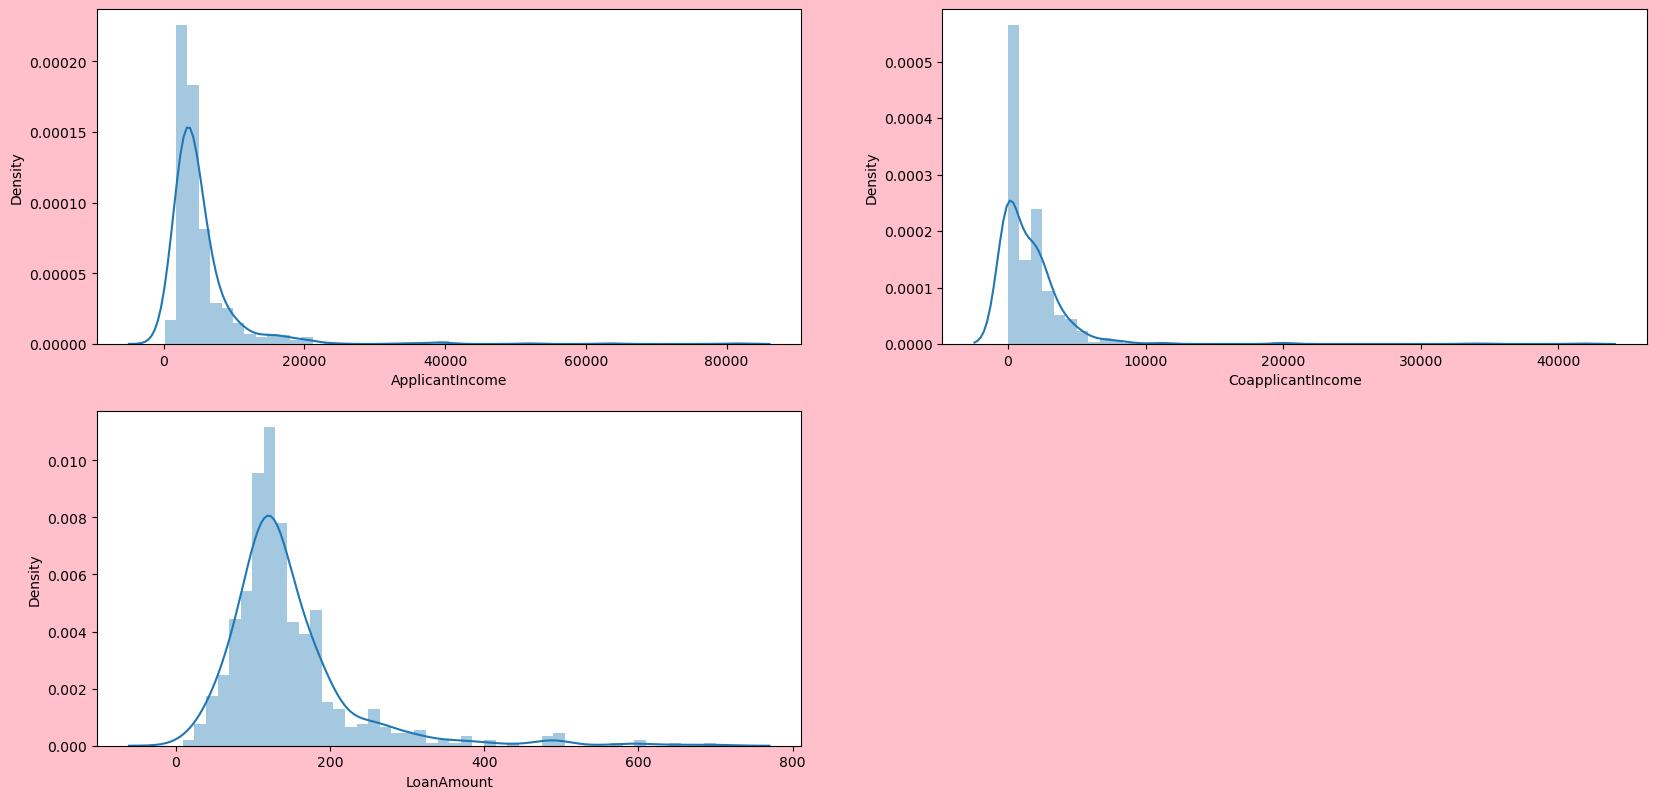

In [21]:
plt.figure(figsize=(20, 20), facecolor="pink")
plotnumber = 1
for i in df1.columns: 
    ax = plt.subplot(4, 2, plotnumber)  
    sns.distplot(df1[i])
    ax.set_xlabel(i)
    plotnumber += 1

plt.show()


In [22]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term          NaN
Credit_History            NaN
dtype: float64

In [24]:
df['ApplicantIncome']=np.cbrt(df['ApplicantIncome'])
df['CoapplicantIncome']=np.cbrt(df['CoapplicantIncome'])
df['LoanAmount']=np.cbrt(df['LoanAmount'])

In [25]:
df.skew()

ApplicantIncome      2.083638
CoapplicantIncome    0.196726
LoanAmount           0.862715
Loan_Amount_Term          NaN
Credit_History            NaN
dtype: float64

In [26]:
df['ApplicantIncome']=np.sqrt(df['ApplicantIncome'])

In [27]:
df.skew()

ApplicantIncome      1.292001
CoapplicantIncome    0.196726
LoanAmount           0.862715
Loan_Amount_Term          NaN
Credit_History            NaN
dtype: float64

In [28]:
df['ApplicantIncome']=np.cbrt(df['ApplicantIncome'])

In [29]:
df.skew()

ApplicantIncome      0.762088
CoapplicantIncome    0.196726
LoanAmount           0.862715
Loan_Amount_Term          NaN
Credit_History            NaN
dtype: float64

here we removed skewness from ourdataset

### checking for correlation 

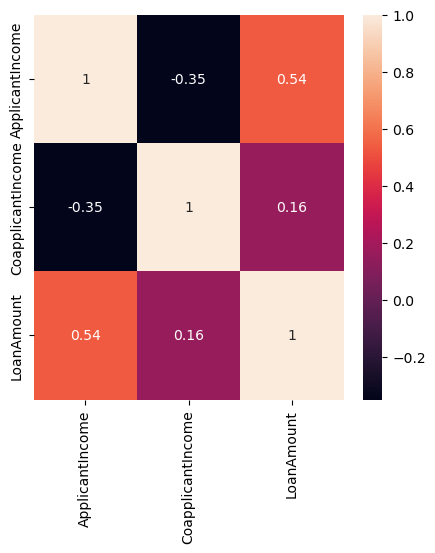

In [30]:
correlation = df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(correlation , annot = True)
plt.show()

here we can see that there is no multicollinearity

### using label encoder

In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])


In [32]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,1.619132,0.000000,5.039684,6,1,2,1
1,1,1,1,1,0,0,1.597339,11.467457,5.039684,6,1,0,0
2,2,1,1,0,0,1,1.560175,0.000000,4.041240,6,1,2,1
3,3,1,1,0,1,0,1.547257,13.310098,4.932424,6,1,2,1
4,4,1,0,0,0,0,1.621427,0.000000,5.204828,6,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,1.557240,0.000000,4.140818,6,1,0,1
610,610,1,1,3,0,0,1.587616,0.000000,3.419952,2,1,0,1
611,611,1,1,1,0,0,1.648369,6.214465,6.324704,6,1,2,1
612,612,1,1,2,0,0,1.642656,0.000000,5.718479,6,1,2,1


### Seperating features and target variable

In [33]:
X=  df.drop(['Loan_ID','Loan_Status'], axis = 1)
Y=df['Loan_Status'] 

### Oversampling

In [34]:
df.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [35]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(X,Y)

In [36]:
y1.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

## Creating train test Split

In [37]:
from sklearn.model_selection import train_test_split
for i in range(1,100):
    X_train,X_test,Y_train,Y_test =train_test_split (x1,y1, test_size = 0.25 , random_state = i)

In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

## Models

#### AdaBoostClassifier

In [39]:
abc = AdaBoostClassifier()
abc.fit(X_train, Y_train)
y_pred = abc.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.7977883096366508


In [40]:
y_pred_testABC  = abc.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testABC ) # checking test data 
print('accuracy score of test data-->',accuracy)

accuracy score of test data--> 0.7393364928909952


In [41]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testABC))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.77      0.71      0.74       111
           1       0.71      0.77      0.74       100

    accuracy                           0.74       211
   macro avg       0.74      0.74      0.74       211
weighted avg       0.74      0.74      0.74       211



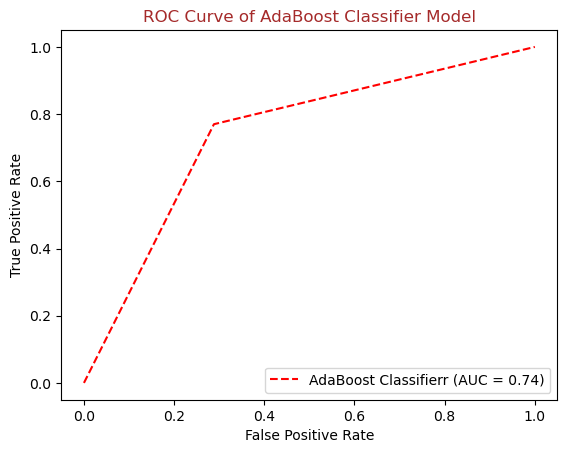

 Here we can area under the curve is --> 0.7408558558558559


In [42]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testABC)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="AdaBoost Classifierr") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of AdaBoost Classifier Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

#### RandomForestClassifier

In [43]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 1.0


In [44]:
y_pred_testRFC  = rfc.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testRFC ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.8341232227488151


In [45]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testRFC))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       111
           1       0.80      0.86      0.83       100

    accuracy                           0.83       211
   macro avg       0.83      0.84      0.83       211
weighted avg       0.84      0.83      0.83       211



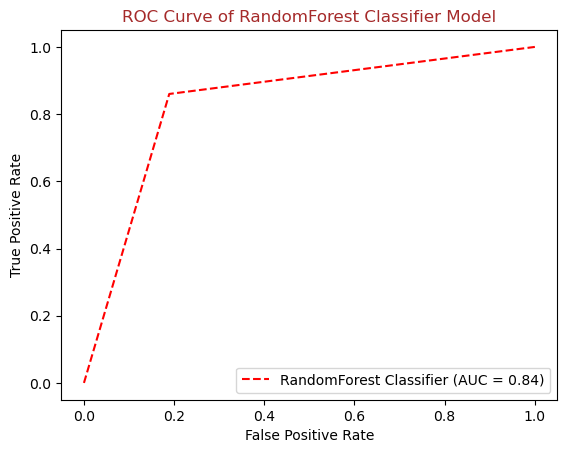

 Here we can area under the curve is --> 0.8354054054054052


In [46]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testRFC)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="RandomForest Classifier") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of RandomForest Classifier Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

#### LogisticRegression 

In [47]:
log_R =LogisticRegression()
log_R.fit(X_train, Y_train)
y_pred = log_R.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.7677725118483413


In [48]:
y_pred_testLR  = log_R.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testLR ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.7440758293838863


In [49]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testLR))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.84      0.63      0.72       111
           1       0.68      0.87      0.76       100

    accuracy                           0.74       211
   macro avg       0.76      0.75      0.74       211
weighted avg       0.77      0.74      0.74       211



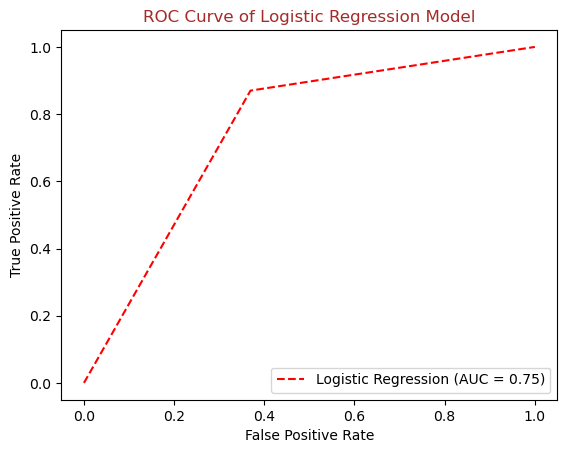

 Here we can area under the curve is --> 0.7503153153153154


In [50]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testLR)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="Logistic Regression") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of Logistic Regression Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

#### SVC

In [51]:
SVM = SVC()
SVM.fit(X_train, Y_train)
y_pred = SVM.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.7661927330173776


In [52]:
y_pred_testSVM  = SVM.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testSVM ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.7535545023696683


In [53]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testSVM))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.84      0.66      0.74       111
           1       0.69      0.86      0.77       100

    accuracy                           0.75       211
   macro avg       0.77      0.76      0.75       211
weighted avg       0.77      0.75      0.75       211



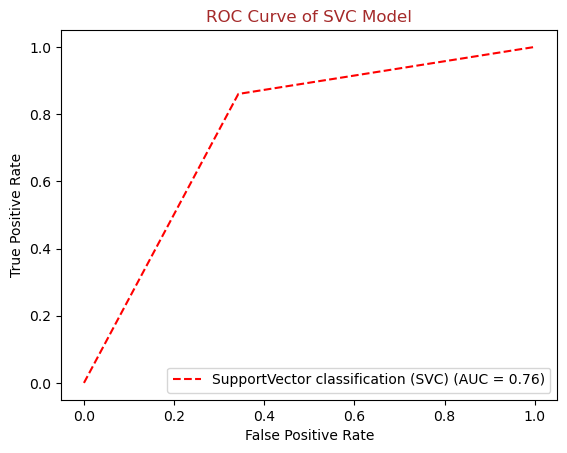

 Here we can area under the curve is --> 0.7588288288288287


In [54]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testSVM)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="SupportVector classification (SVC)") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of SVC Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

#### GradientBoostingClassifier 

In [55]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, Y_train)
y_pred = GBC.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.8925750394944708


In [56]:
y_pred_testGBC  = GBC.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testGBC ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.7819905213270142


In [57]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testGBC))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.86      0.70      0.77       111
           1       0.72      0.87      0.79       100

    accuracy                           0.78       211
   macro avg       0.79      0.79      0.78       211
weighted avg       0.79      0.78      0.78       211



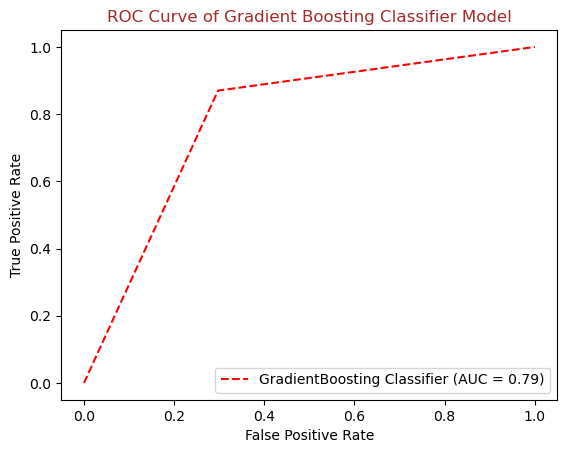

 Here we can area under the curve is --> 0.7863513513513514


In [58]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testGBC)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="GradientBoosting Classifier") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of Gradient Boosting Classifier Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

#### KNN

In [59]:
KNN =KNeighborsClassifier()
KNN.fit(X_train, Y_train)
y_pred = KNN.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.8372827804107424


In [60]:
y_pred_testKNN  = KNN.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testKNN ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.7677725118483413


In [61]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testKNN))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       111
           1       0.76      0.75      0.75       100

    accuracy                           0.77       211
   macro avg       0.77      0.77      0.77       211
weighted avg       0.77      0.77      0.77       211



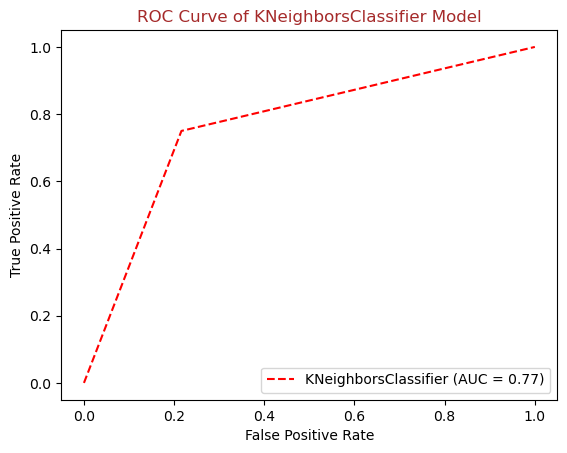

 Here we can area under the curve is --> 0.7668918918918919


In [62]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testKNN)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="KNeighborsClassifier") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of KNeighborsClassifier Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

## Cross Validation

In [63]:
from sklearn.model_selection import cross_val_score

In [64]:
cscore1 = cross_val_score(rfc,x1,y1)
print('Cscore for RandomForest Classifier-> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testRFC)-cscore1.mean())

Cscore for RandomForest Classifier->  [0.75739645 0.78106509 0.80473373 0.85798817 0.86904762]
mean of cscore->  0.8140462102000564
difference between accuracy and cross validation score is 0.02007701254875871


In [65]:
cscore2 = cross_val_score(KNN,x1,y1)
print('Cscore for Kneighbours Classifier ',cscore2)
print('mean of cscore-> ',cscore2.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testKNN)-cscore2.mean())

Cscore for Kneighbours Classifier  [0.72189349 0.72189349 0.73372781 0.79881657 0.76190476]
mean of cscore->  0.7476472245703014
difference between accuracy and cross validation score is 0.02012528727803986


In [66]:
cscore3 = cross_val_score(abc,x1,y1)
print('Cscore for AdaBoost Classifier-> ',cscore3)
print('mean of cscore-> ',cscore3.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testABC)-cscore3.mean())

Cscore for AdaBoost Classifier->  [0.69822485 0.72189349 0.75739645 0.79881657 0.79166667]
mean of cscore->  0.7535996055226823
difference between accuracy and cross validation score is -0.014263112631687114


In [67]:
cscore3 = cross_val_score(abc,x1,y1)
print('Cscore for AdaBoost Classifier-> ',cscore3)
print('mean of cscore-> ',cscore3.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testABC)-cscore3.mean())

Cscore for AdaBoost Classifier->  [0.69822485 0.72189349 0.75739645 0.79881657 0.79166667]
mean of cscore->  0.7535996055226823
difference between accuracy and cross validation score is -0.014263112631687114


In [68]:
cscore4 = cross_val_score(GBC,x1,y1)
print('Cscore for Gradient Boost Classifier -> ',cscore4)
print('mean of cscore-> ',cscore4.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testGBC)-cscore4.mean())

Cscore for Gradient Boost Classifier ->  [0.71597633 0.71005917 0.75147929 0.78106509 0.82142857]
mean of cscore->  0.7560016906170752
difference between accuracy and cross validation score is 0.02598883070993896


In [69]:
cscore5 = cross_val_score(SVM,x1,y1)
print('Cscore for SUpport Vector Machine-> ',cscore5)
print('mean of cscore-> ',cscore5.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testSVM)-cscore5.mean())

Cscore for SUpport Vector Machine->  [0.69822485 0.72189349 0.78106509 0.79881657 0.77380952]
mean of cscore->  0.7547619047619047
difference between accuracy and cross validation score is -0.0012074023922364896


In [70]:
cscore6 = cross_val_score(log_R,x1,y1)
print('Cscore for Logistic Regression',cscore6)
print('mean of cscore-> ',cscore6.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testLR)-cscore6.mean())

Cscore for Logistic Regression [0.66863905 0.73964497 0.74556213 0.79881657 0.77380952]
mean of cscore->  0.745294449140603
difference between accuracy and cross validation score is -0.0012186197567167767


here we choose randomforest Classifier based on the cross value score 

## Hyper parameter tuning

In [71]:
rfc.get_params().keys()


dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [72]:
parameters = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ["sqrt", "log2", None, 0.5],
    'max_leaf_nodes': [None, 50, 100],
}


In [73]:
GSC = GridSearchCV(RandomForestClassifier(),parameters,cv= 5)

In [74]:
GSC.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2', None, 0.5],
                         'max_leaf_nodes': [None, 50, 100],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000]})

In [75]:
GSC.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': 100,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [76]:
rfc_final =RandomForestClassifier(max_depth= None,max_leaf_nodes= 100,min_samples_leaf= 1,min_samples_split= 2,n_estimators= 100)
rfc_final.fit(X_train, Y_train)
y_pred = rfc_final.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred )  
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.9936808846761453


In [77]:
y_pred_testrfc  = rfc_final.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testrfc )  
print('accuracy score of test data-->',accuracy)

accuracy score of test data--> 0.8436018957345972


## Model Saving

In [79]:
import joblib
joblib.dump(rfc_final, 'loan prediction')

['loan prediction']

# Prediction 

In [80]:
mymodel = joblib.load('loan prediction')
prdt = mymodel.predict(X_test)
prdt

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

## comparing from original 

In [81]:
Orginal = np.array(Y_test)
data1 = pd.DataFrame({'predicted': prdt,'original':Orginal})
data1

,predicted,original
0,0,1
1,1,0
2,1,1
3,1,0
4,0,1
...,...,...
206,1,1
207,1,1
208,1,1
209,1,1


hence we can see that our model predicted most of the values  